# Background
* Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, Walmart has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. For which it has included four holidays’ weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labor Day. Here we are owing to Analyze the dataset given. Before doing that, let me point out the objective of this analysis.

# Business Objectives
* Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store?



# Importing necessary libraries

In [2]:
# !pip install catboost
# !pip install xgboost


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta


## ML Models for regressions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR


# # ML models Classfications
# from sklearn.model_selection import train_test_split,  cross_val_score
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from catboost import CatBoostClassifier
# # For SVC (Support Vector Classifier)
# from sklearn.svm import SVC

# # For Random Forest Classifier (RFC)
# from sklearn.ensemble import RandomForestClassifier

# # For Decision Tree Classifier (DTC)
# from sklearn.tree import DecisionTreeClassifier

# # For CatBoost Classifier
# from catboost import CatBoostClassifier

# # For XGBoost Classifier
# from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.options.display.max_columns=100

# Collecting the data
1. collecting all datasets and read
2. display all datasets
3. merging for train and test

In [5]:
# Read All DataSets
store=pd.read_csv('stores.csv')
features=pd.read_csv('features.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')


In [6]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
# merging 3 different sets
df = train.merge(features, on=['Store', 'Date'], how='inner').merge(store, on=['Store'], how='inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


# Information about the data
* deep look in all informations such as nulls and unique duplicated...etc

In [10]:
# HOT FUNCTION
def col_sum(data):
    col=[]
    n_null=[]
    n_unique=[]
    unique=[]
    duplicated=[]
    dType=[]

    for column in data.columns:
        col.append(column)
        n_null.append(data[column].isnull().sum())
        n_unique.append(data[column].nunique())
        unique.append(data[column].unique())
        duplicated.append(data[column].duplicated().sum())
        dType.append(data[column].dtype)
    return pd.DataFrame({"Columns ": col , "Data Type ": dType ,"Null ": n_null,
                         "unique" : unique ,"n_unique" : n_unique ,
                         "Duplicated ": duplicated})


Delete one of the IsHoliday_y and change to the IsHoliday

In [11]:
df.drop(['IsHoliday_y'],axis=1, inplace=True)
df.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)
df.sample(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
271707,28,90,2011-05-13,60316.61,False,70.93,4.202,NaN,NaN,NaN,NaN,NaN,129.089000,13.736,A,206302
271371,28,11,2011-04-15,10786.98,False,57.63,3.868,NaN,NaN,NaN,NaN,NaN,128.910733,13.736,A,206302
268191,28,4,2010-06-04,30790.42,False,81.39,2.941,NaN,NaN,NaN,NaN,NaN,126.136065,14.099,A,206302


In [12]:
col_sum(df)

,Columns,Data Type,Null,unique,n_unique,Duplicated
0,Store,int64,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",45,421525
1,Dept,int64,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",81,421489
2,Date,object,0,"[2010-02-05, 2010-02-12, 2010-02-19, 2010-02-2...",143,421427
3,Weekly_Sales,float64,0,"[24924.5, 50605.27, 13740.12, 39954.04, 32229....",359464,62106
4,IsHoliday,bool,0,"[False, True]",2,421568
5,Temperature,float64,0,"[42.31, 38.51, 39.93, 46.63, 46.5, 57.79, 54.5...",3528,418042
6,Fuel_Price,float64,0,"[2.572, 2.548, 2.514, 2.561, 2.625, 2.667, 2.7...",892,420678
7,MarkDown1,float64,270889,"[nan, 10382.9, 6074.12, 410.31, 5629.51, 4640....",2277,419292
8,MarkDown2,float64,310322,"[nan, 6115.67, 254.39, 98.0, 68.0, 19.0, 67.0,...",1499,420070
9,MarkDown3,float64,284479,"[nan, 215.07, 51.98, 55805.51, 1398.11, 105.02...",1662,419907


In [13]:
df.shape

(421570, 16)

# Columns

## Store & Dept

To look at the average weekly sales for each store and each department,similar to what you did previously. However, this time, we will not specify the aggfunc parameter, which by default will calculate the mean. Additionally, you can sort the results to identify any potentially weird or outlier values more easily. Here's the code:



In [14]:
store_dept= pd.pivot_table(df, index='Store', columns='Dept', values='Weekly_Sales', aggfunc=np.mean)
store_dept.head()

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.34,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.56,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,89248.965524,66535.40

## If i found any week_sales not bigger than 0 I'll deleted

In [15]:
df.loc[df['Weekly_Sales'] < 0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4419,1,47,2011-04-08,-298.00,False,67.84,3.622,NaN,NaN,NaN,NaN,NaN,215.074394,7.682,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419999,45,49,2012-05-18,-3.97,False,66.30,3.848,6813.74,NaN,13.86,936.49,2941.55,190.996448,8.567,B,118221
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221


**Delete all 1285 rows**

In [16]:
df = df.loc[~(df['Weekly_Sales'] < 0 )]

In [17]:
df.shape

(420285, 16)

## Date

In [18]:
df['Date'].head()

0    2010-02-05
1    2010-02-05
2    2010-02-05
3    2010-02-05
4    2010-02-05
Name: Date, dtype: object

In [19]:
df['Date'].tail(5)

421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

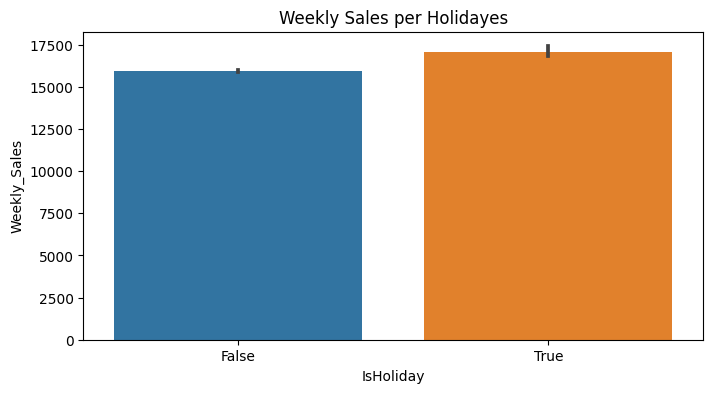

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(x='IsHoliday',y='Weekly_Sales',data=df)
plt.title('Weekly Sales per Holidayes')
plt.show()

In [21]:
# Let's see When Holiday= True what is the date
holiday= df.loc[df['IsHoliday']==True]


In [22]:
print(f'Number of Unique values is: {holiday.Date.nunique()}\n\n')
print(f'Date is : {holiday.Date.unique()}')


Number of Unique values is: 10


Date is : ['2010-02-12' '2010-09-10' '2010-11-26' '2010-12-31' '2011-02-11'
 '2011-09-09' '2011-11-25' '2011-12-30' '2012-02-10' '2012-09-07']


### important dates :
* Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

* Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

* Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

* Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [23]:
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [24]:
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False


In [25]:
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25') ,'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25') ,'Thanksgiving'] = False


In [26]:
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30') ,'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30') ,'Christmas'] = False


In [27]:
df.sample(4)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
142898,15,12,2011-06-03,4656.29,False,69.80,4.069,NaN,NaN,NaN,NaN,NaN,134.855161,7.658,B,123737,False,False,False,False
593,1,14,2010-04-02,14333.75,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315,False,False,False,False
416081,45,92,2011-04-08,48868.54,False,48.71,3.720,NaN,NaN,NaN,NaN,NaN,185.363666,8.521,B,118221,False,False,False,False
344088,36,12,2011-10-14,35.79,False,74.16,3.234,NaN,NaN,NaN,NaN,NaN,216.088526,7.716,A,39910,False,False,False,False


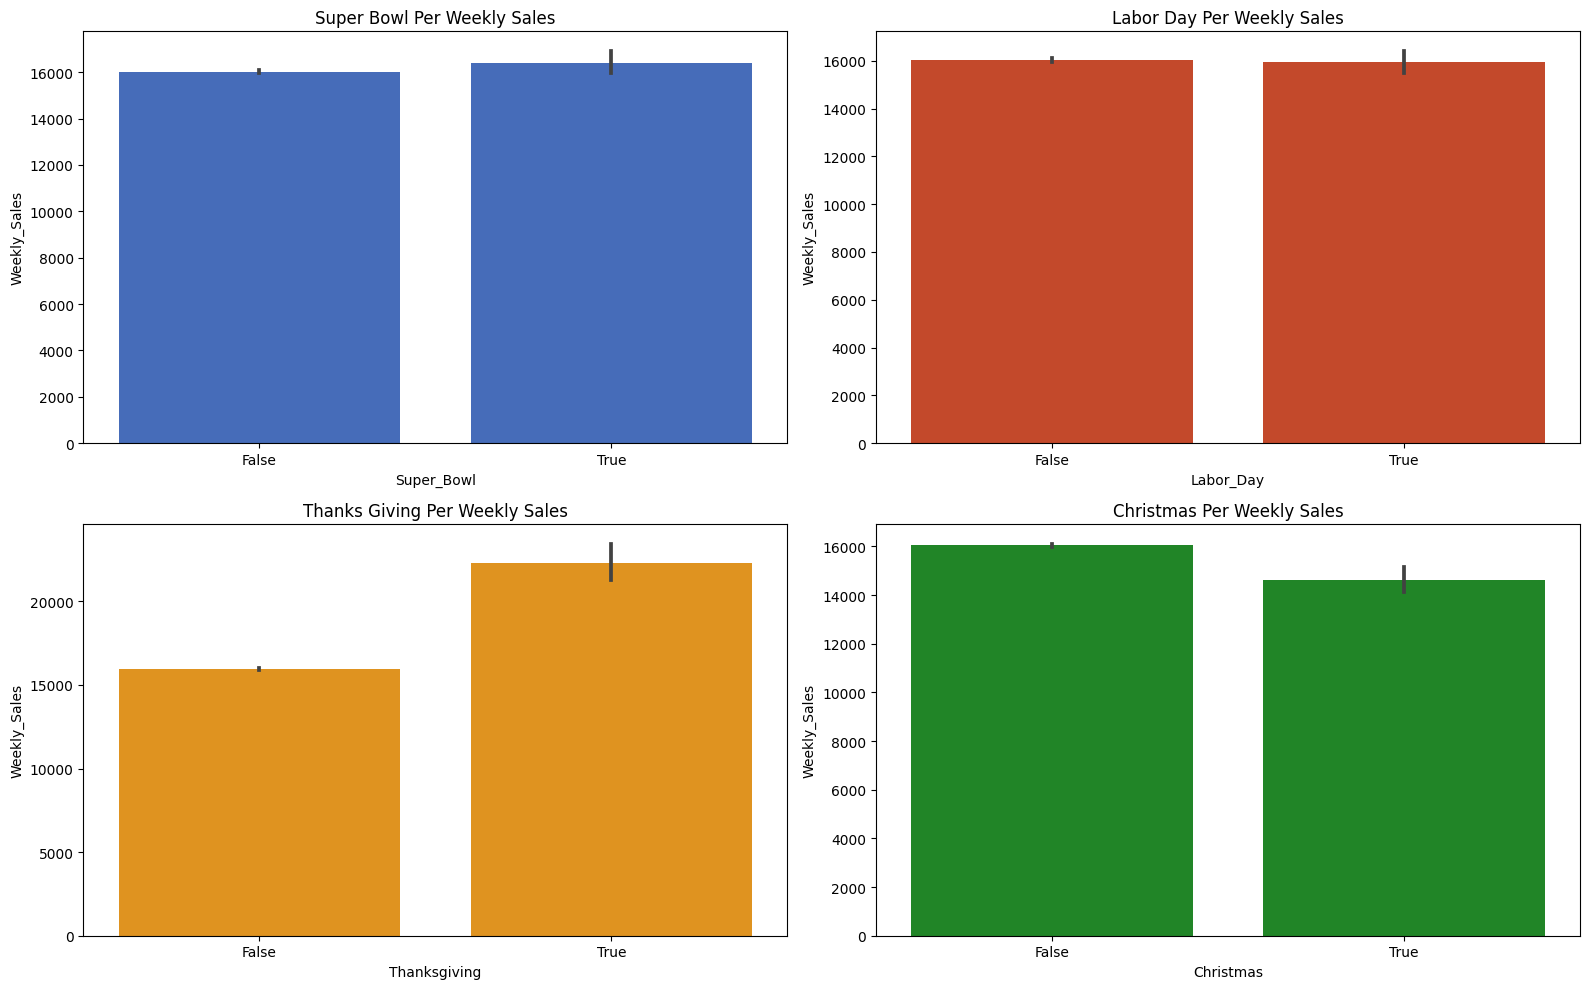

In [28]:
# Define custom color palettes for each subplot
super_bowl_palette = ['#3366cc']
labor_day_palette = ['#dc3912']
thanksgiving_palette = ['#ff9900']
christmas_palette = ['#109618']


plt.figure(figsize=(16,10))

# Super Bowl
plt.subplot(2,2,1)
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df, palette=super_bowl_palette)
plt.title('Super Bowl Per Weekly Sales')
plt.tight_layout()

# Labor Day
plt.subplot(2,2,2)
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df, palette=labor_day_palette)
plt.title('Labor Day Per Weekly Sales')
plt.tight_layout()

# Thanks Giving
plt.subplot(2,2,3)
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df, palette=thanksgiving_palette)
plt.title('Thanks Giving Per Weekly Sales')
plt.tight_layout()


#Christmas
plt.subplot(2,2,4)
sns.barplot(x='Christmas', y='Weekly_Sales', data=df, palette= christmas_palette)
plt.title('Christmas Per Weekly Sales')
plt.tight_layout()

plt.show()

The bar plots compare the impact of holidays on average weekly sales. Labor Day and Christmas have minimal effects on sales, while Super Bowl week shows a positive influence. However, the most significant sales difference occurs during Thanksgiving week. The increase in Thanksgiving sales is likely due to early Christmas gift purchases and the influence of Black Friday sales. Overall, Super Bowl and Thanksgiving have a more pronounced impact on average weekly sales compared to Labor Day and Christmas

Date
* Convert to Week, Month and Year

In [29]:
df['Date']= pd.to_datetime(df['Date']) # Convert to datatime
df['Week']=df['Date'].dt.week
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year

In [30]:
df.groupby("Month")['Weekly_Sales'].mean()

Month
1     14177.402925
2     16044.626423
3     15462.397412
4     15693.388747
5     15843.753725
6     16394.151442
7     15903.137562
8     16109.142779
9     15145.234221
10    15277.585465
11    17533.475488
12    19424.490336
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

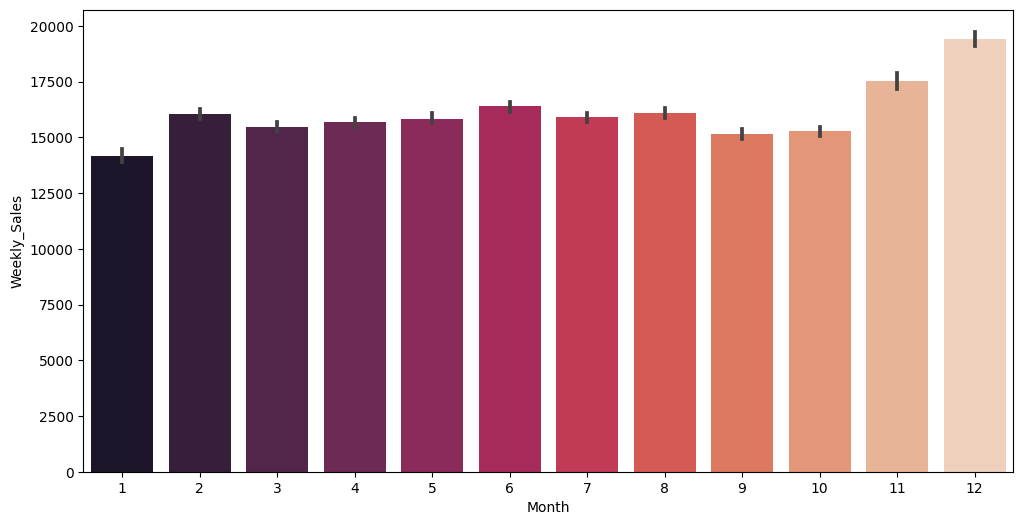

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='Weekly_Sales',data=df ,palette='rocket')

In [32]:
df.groupby("Year")['Weekly_Sales'].mean()

Year
2010    16315.740243
2011    16004.658586
2012    15746.033424
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Month'>

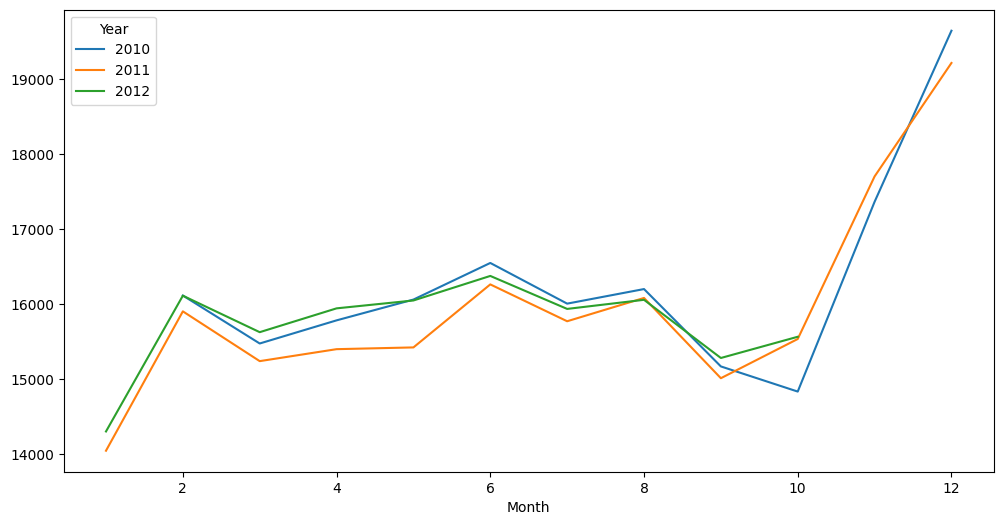

In [33]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot(figsize=(12,6))

In [34]:
df.groupby("Week")['Weekly_Sales'].mean().sort_values(ascending=False)[:5]

Week
51    26449.733674
47    22269.601768
50    20478.421134
49    18731.794840
22    16852.791563
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Week'>

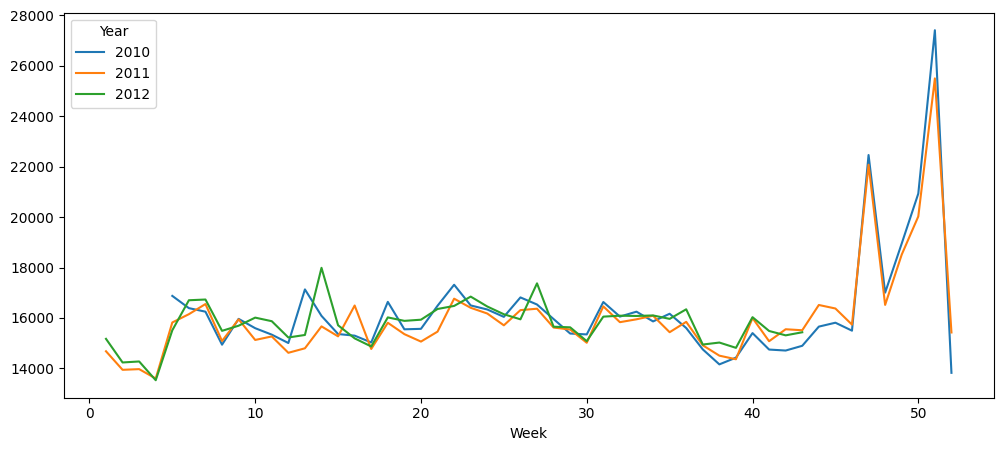

In [35]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot(figsize=(12,5))

<Axes: xlabel='Week', ylabel='Weekly_Sales'>

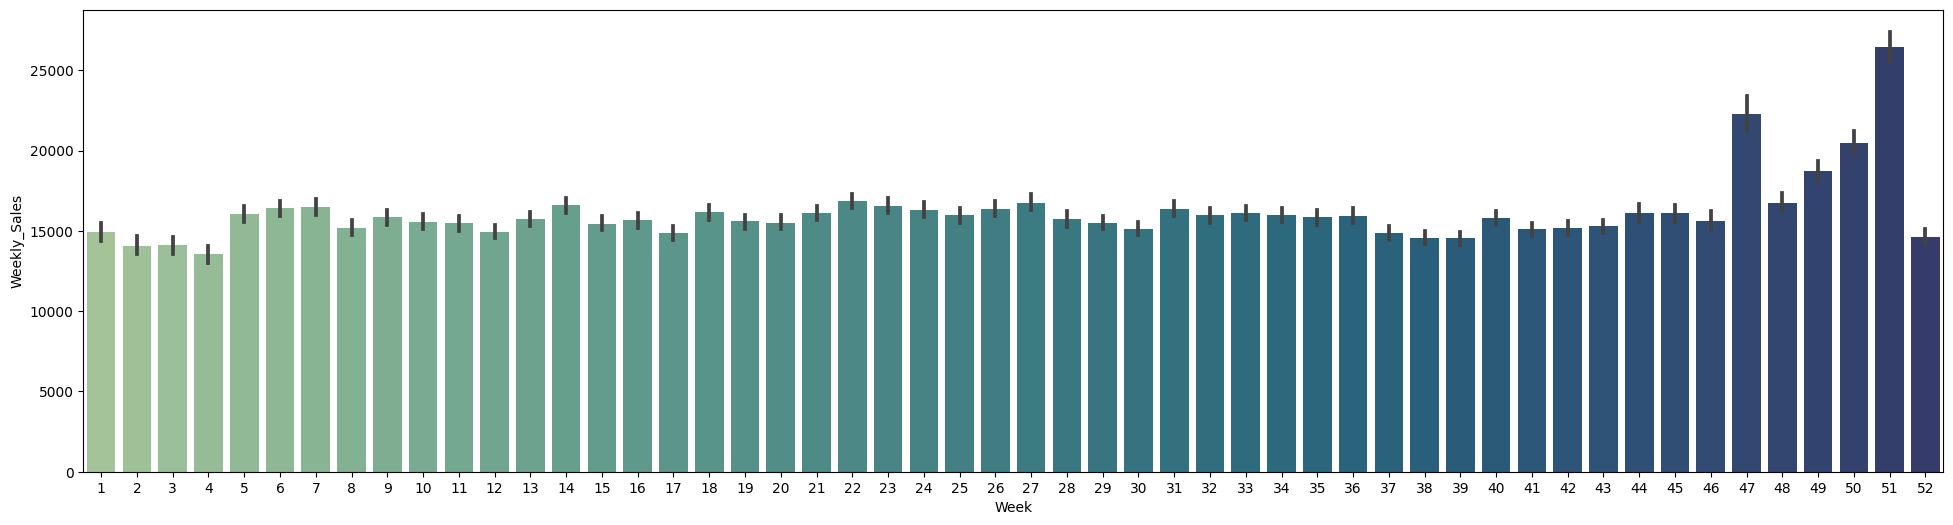

In [36]:
plt.figure(figsize=(24,6))
sns.barplot(x='Week', y='Weekly_Sales', data=df, palette='crest')

In [37]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


## Sales

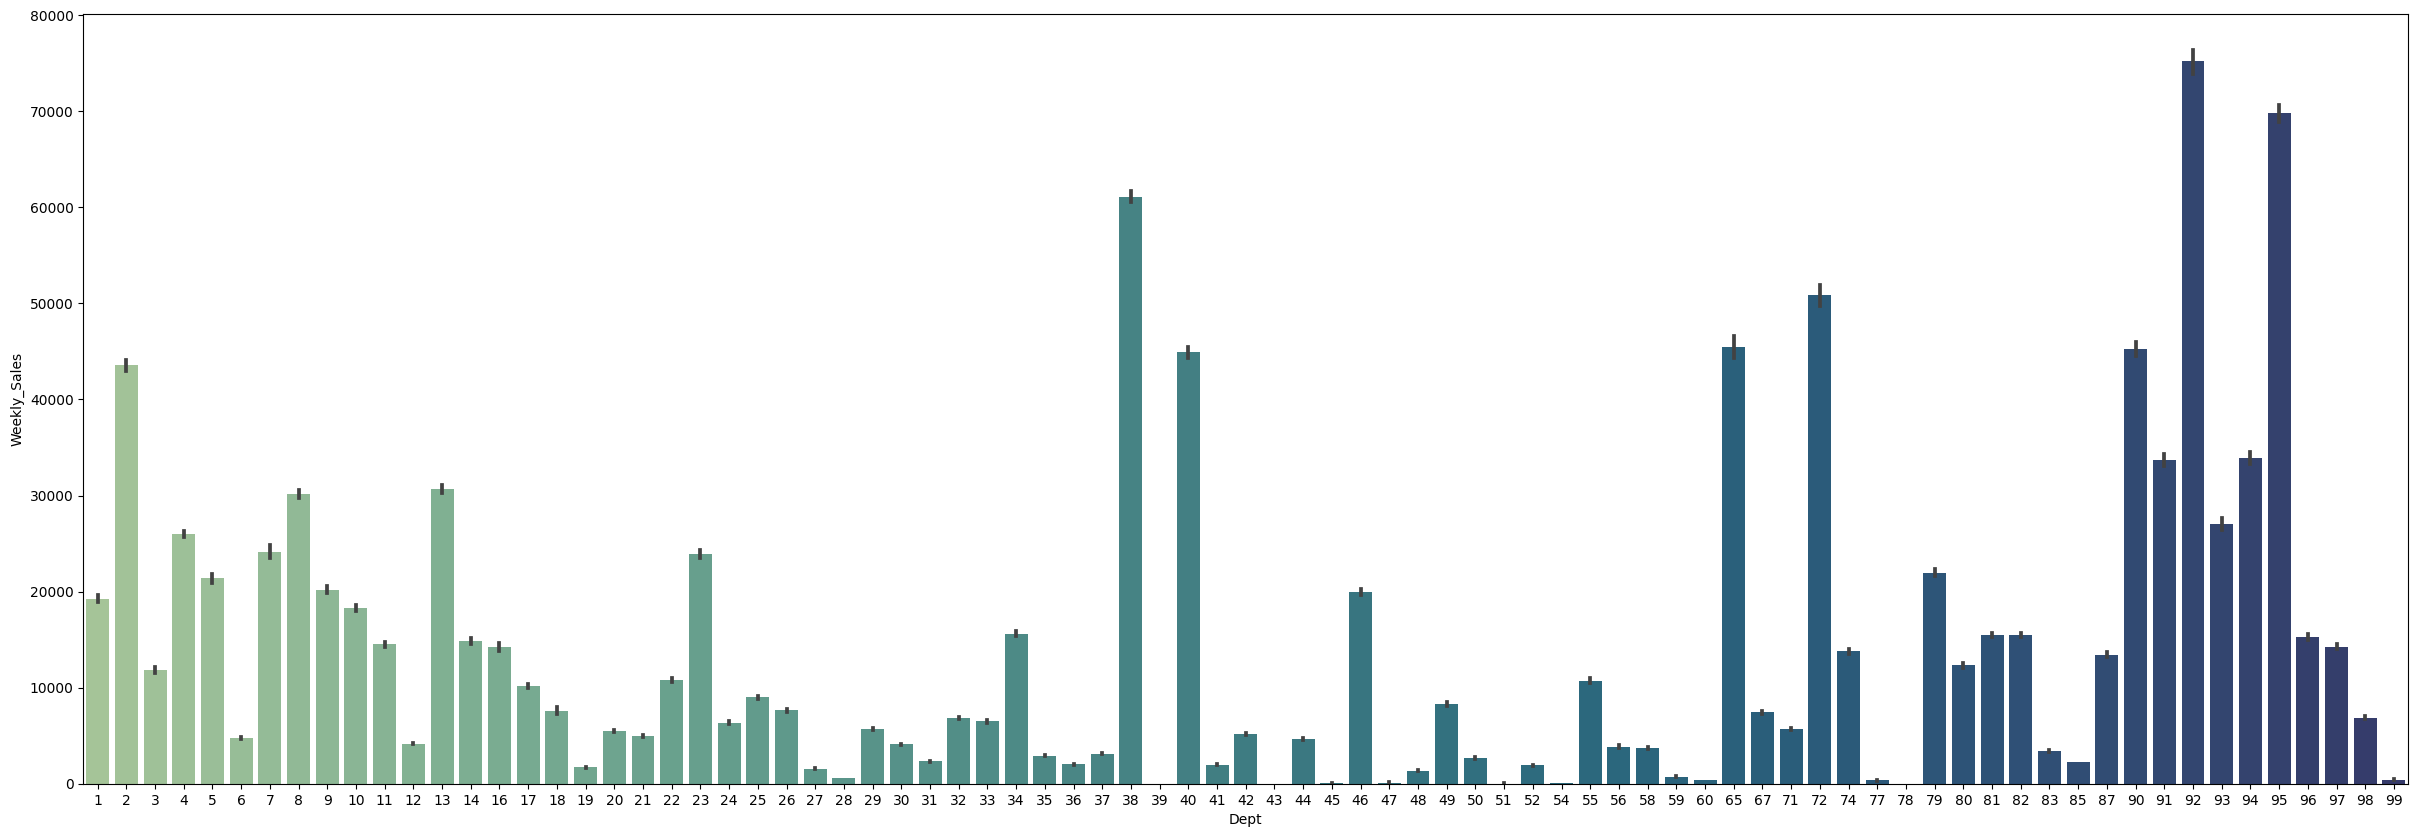

In [38]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df, palette='crest')

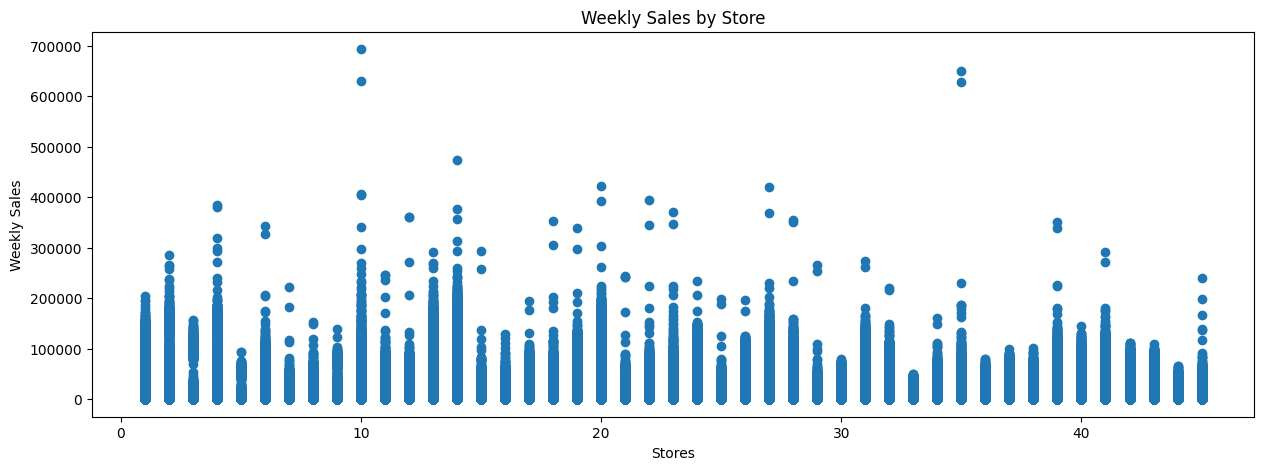

In [39]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()


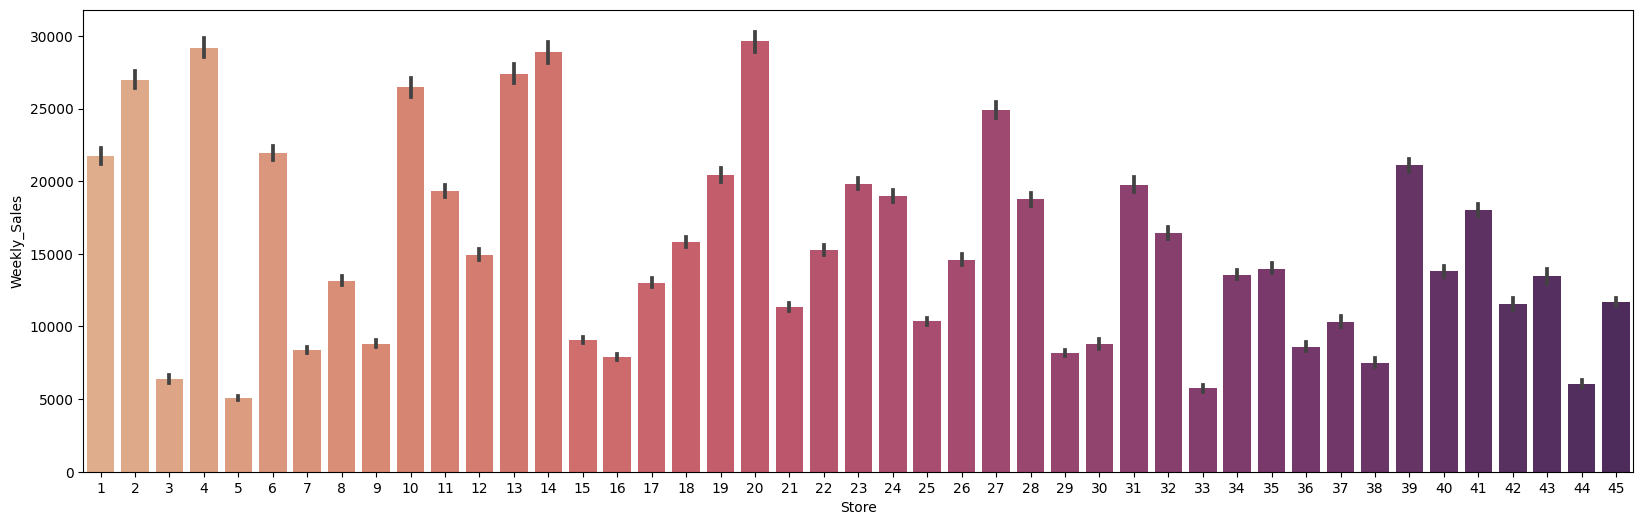

In [40]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df, palette='flare')


## Temperature & Fuel Price  

<Axes: xlabel='Temperature'>

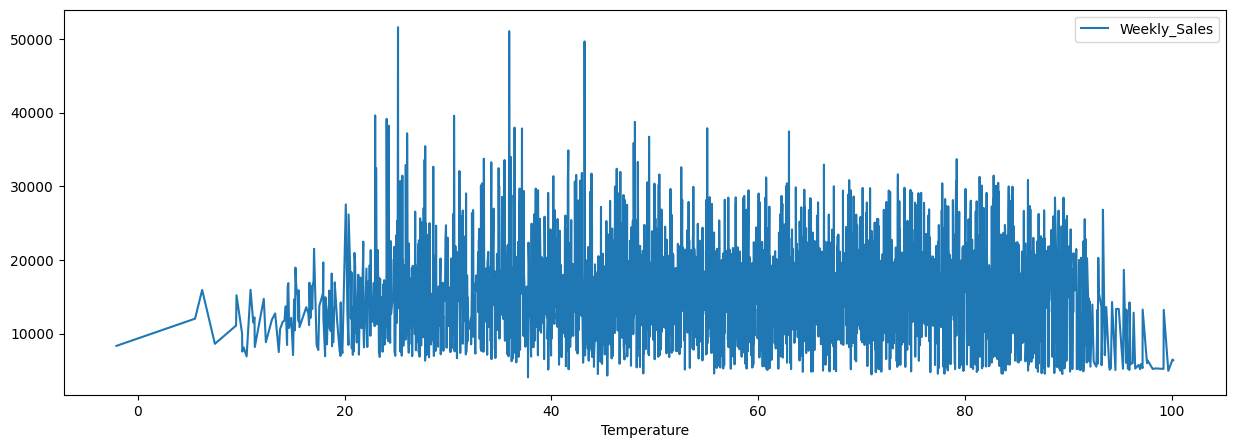

In [41]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot(figsize=(15,5))


<Axes: xlabel='Fuel_Price'>

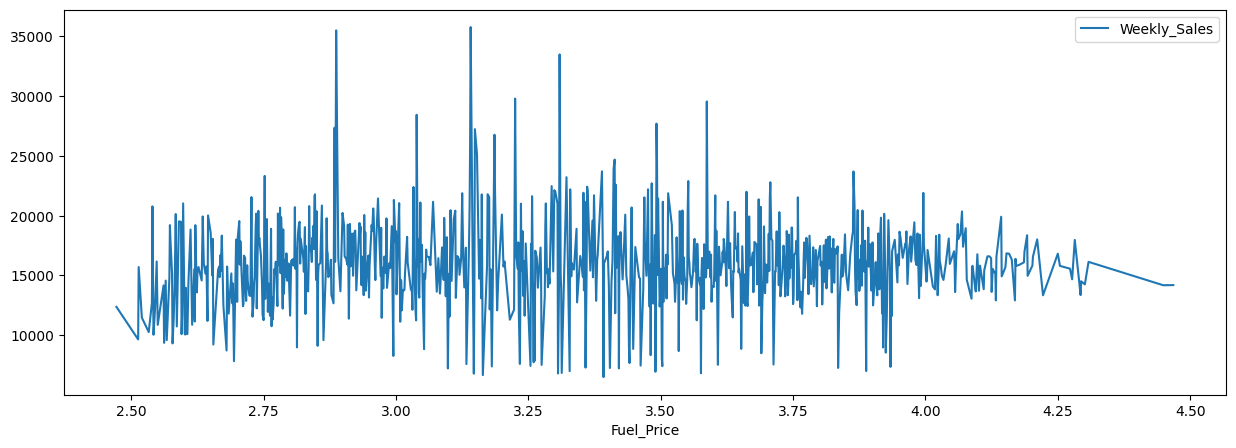

In [42]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot(figsize=(15,5))

# Dealing With missing Values

In [43]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270085
MarkDown2       309367
MarkDown3       283618
MarkDown4       285750
MarkDown5       269337
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
Week                 0
Month                0
Year                 0
dtype: int64

In [44]:
# replace all NaN values with 0
df= df.fillna(0)
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
Week            0
Month           0
Year            0
dtype: int64

# Save the data Frame clean

In [45]:
df.to_csv('data.csv')

In [46]:
df = pd.read_csv('data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [47]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [48]:
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
df1=df.copy()

## Encode the data with the appropriate technique

In [50]:
# IsHoliday Column
df1['IsHoliday']= df1['IsHoliday'].astype(bool).astype(int) # Convert True and False to 1 and 0

# Type Column
map= {'A': 1, 'B':2 , 'C':3 }
df1['Type']= df1['Type'].replace(map)

# Super_Bowl Column
df1['Super_Bowl']= df1['Super_Bowl'].astype(bool).astype(int) # Convert True and False to 1 and 0

# Labor_Day	Column
df1['Labor_Day']= df1['Labor_Day'].astype(bool).astype(int) # Convert True and False to 1 and 0

# Thanksgiving column
df1['Thanksgiving']= df1['Thanksgiving'].astype(bool).astype(int) # Convert True and False to 1 and 0

# Christmas Column
df1['Christmas']= df1['Christmas'].astype(bool).astype(int) # Convert True and False to 1 and 0


In [51]:
data=df1.copy()

## Drop not necessary columns

In [52]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
data.drop(drop_col, axis=1, inplace=True)

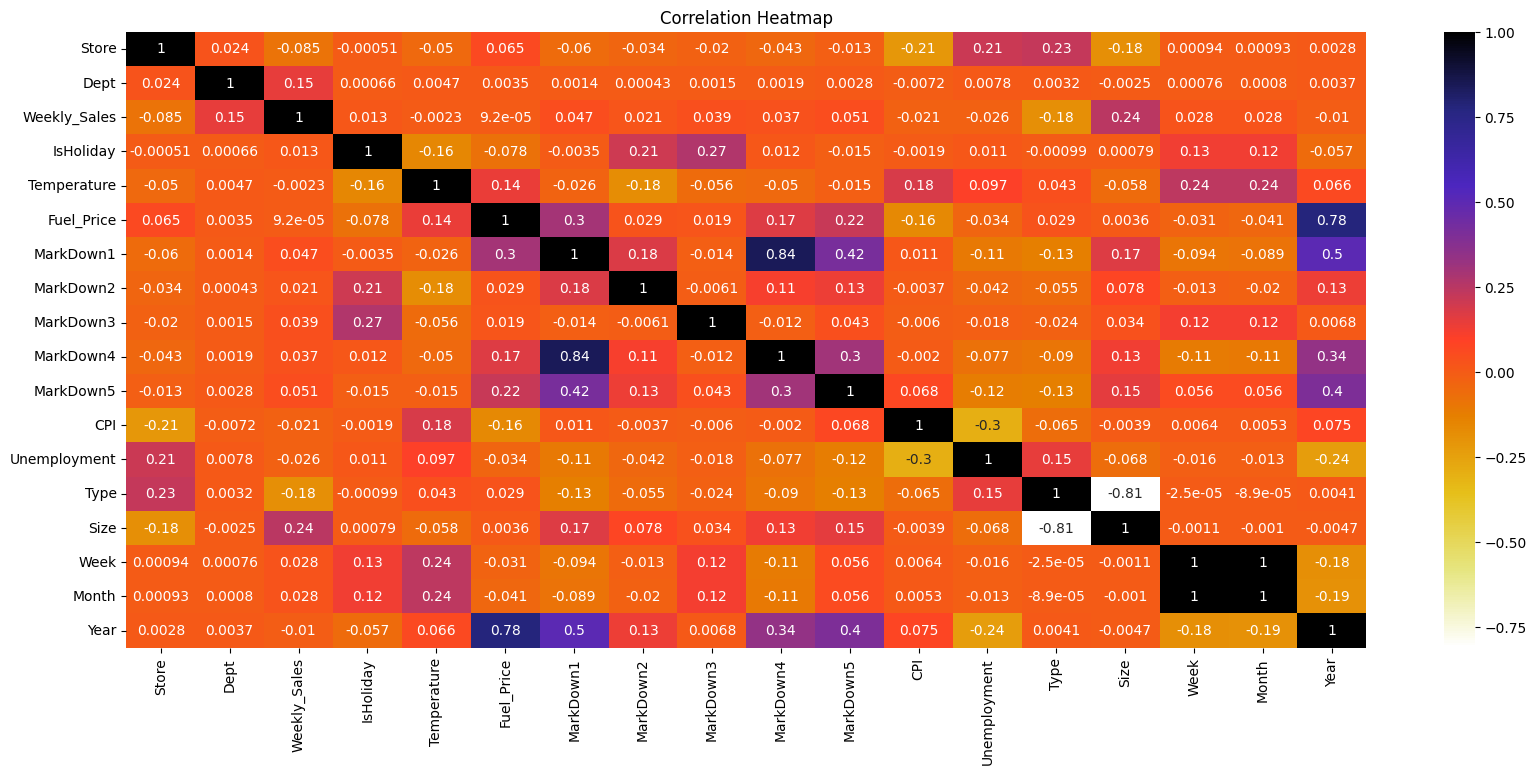

In [53]:
plt.figure(figsize=(20, 8))

sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r)

plt.title('Correlation Heatmap')
plt.show()

* Markdown 4 and 5 highly correlated with Markdown 1 ##  It can create multicollinearity problem
* Temperature, unemployment, CPI have no significant effect on weekly sales

In [54]:
data.shape

(420285, 19)

## Features Selections


### Preprocessing

* **Spliting the data to X and y**

In [55]:
data=data.reset_index()
data.head()

,index,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,5,2,2010
1,1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,5,2,2010
2,2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,5,2,2010
3,3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,5,2,2010
4,4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,5,2,2010


In [56]:
print(f'dataframe info: {data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420285 entries, 0 to 420284
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         420285 non-null  int64         
 1   Store         420285 non-null  int64         
 2   Dept          420285 non-null  int64         
 3   Date          420285 non-null  datetime64[ns]
 4   Weekly_Sales  420285 non-null  float64       
 5   IsHoliday     420285 non-null  int64         
 6   Temperature   420285 non-null  float64       
 7   Fuel_Price    420285 non-null  float64       
 8   MarkDown1     420285 non-null  float64       
 9   MarkDown2     420285 non-null  float64       
 10  MarkDown3     420285 non-null  float64       
 11  MarkDown4     420285 non-null  float64       
 12  MarkDown5     420285 non-null  float64       
 13  CPI           420285 non-null  float64       
 14  Unemployment  420285 non-null  float64       
 15  Type          420

In [57]:
data['Day'] = data['Date'].dt.day


In [58]:
data.drop('Date',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420285 entries, 0 to 420284
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         420285 non-null  int64  
 1   Store         420285 non-null  int64  
 2   Dept          420285 non-null  int64  
 3   Weekly_Sales  420285 non-null  float64
 4   IsHoliday     420285 non-null  int64  
 5   Temperature   420285 non-null  float64
 6   Fuel_Price    420285 non-null  float64
 7   MarkDown1     420285 non-null  float64
 8   MarkDown2     420285 non-null  float64
 9   MarkDown3     420285 non-null  float64
 10  MarkDown4     420285 non-null  float64
 11  MarkDown5     420285 non-null  float64
 12  CPI           420285 non-null  float64
 13  Unemployment  420285 non-null  float64
 14  Type          420285 non-null  int64  
 15  Size          420285 non-null  int64  
 16  Week          420285 non-null  int64  
 17  Month         420285 non-null  int64  
 18  Year

In [59]:
X = data.drop([ 'Weekly_Sales'], axis=1)
y=data['Weekly_Sales']

In [60]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=10 )

In [61]:
X.head()

,index,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year,Day
0,0,1,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,5,2,2010,5
1,1,1,2,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,5,2,2010,5
2,2,1,3,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,5,2,2010,5
3,3,1,4,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,5,2,2010,5
4,4,1,5,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,5,2,2010,5


In [62]:
y.head()

0    24924.50
1    50605.27
2    13740.12
3    39954.04
4    32229.38
Name: Weekly_Sales, dtype: float64

In [63]:
from sklearn.linear_model import Lasso

# Create Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha value to control the strength of regularization

# Fit Lasso regression on training data
lasso.fit(X_train, y_train)

# Get selected features (coefficients that are not equal to 0)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the original data with selected features
X_selected = X[selected_features]

In [64]:
# Print coefficients for the selected features
coefficients = dict(zip(X.columns, lasso.coef_))
print("Coefficients for selected features:")
print('='*30 ,'\n')
for feature, coef in coefficients.items():
    if feature in selected_features:
        print(f"{feature}: {coef}")
    else:
        print(f"{feature}: Not selected (coefficient is 0)")


Coefficients for selected features:

index: -0.1320505103070843
Store: 1158.3658605335381
Dept: 112.04459288661927
IsHoliday: 408.9102644571823
Temperature: 15.49103893873839
Fuel_Price: 379.1760327679876
MarkDown1: 0.02844541850403289
MarkDown2: 0.014021397152571495
MarkDown3: 0.10826251484339947
MarkDown4: 0.0026477140872743004
MarkDown5: 0.0967607219564985
CPI: -21.139800542382822
Unemployment: -167.73851823026502
Type: 1675.0758270357385
Size: 0.10159239960556403
Week: 76.45091264209834
Month: -163.3237910076621
Year: -230.26978882880184
Day: -27.28800034962227


In [65]:
col_delete= ['CPI','Unemployment','Month','Year','Day','index']

df2 =data.drop(col_delete,axis=1)


In [66]:
df2.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,Week
0,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,1,151315,5
1,1,2,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,1,151315,5
2,1,3,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,1,151315,5
3,1,4,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,1,151315,5
4,1,5,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,1,151315,5


## Spliting the data for the models

In [67]:
X=df2.drop('Weekly_Sales', axis=1)
y=df2['Weekly_Sales']

In [68]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=10)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(294199, 13)
(126086, 13)
(294199,)
(126086,)


# SVC Model

# Random Forest Regresor

In [70]:
# Create the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features='auto')

# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='auto', n_estimators=200)

In [71]:
y_pred_rf = rf.predict(X_test)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)


# Print results
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R²): {:.2f}".format(r2))

Mean Absolute Error (MAE): 1528.85
Mean Squared Error (MSE): 13093513.36
R-squared (R²): 0.97


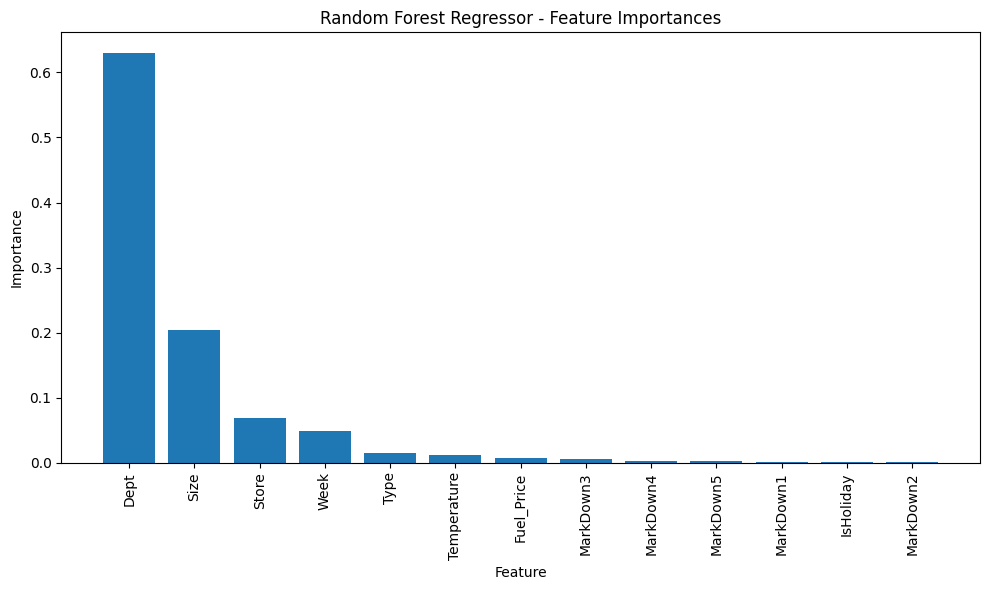

In [86]:
feature_importances = rf.feature_importances_

# Get the feature names
feature_names = list(X.columns)

# Sort the features and their importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Regressor - Feature Importances')
plt.tight_layout()
plt.show()

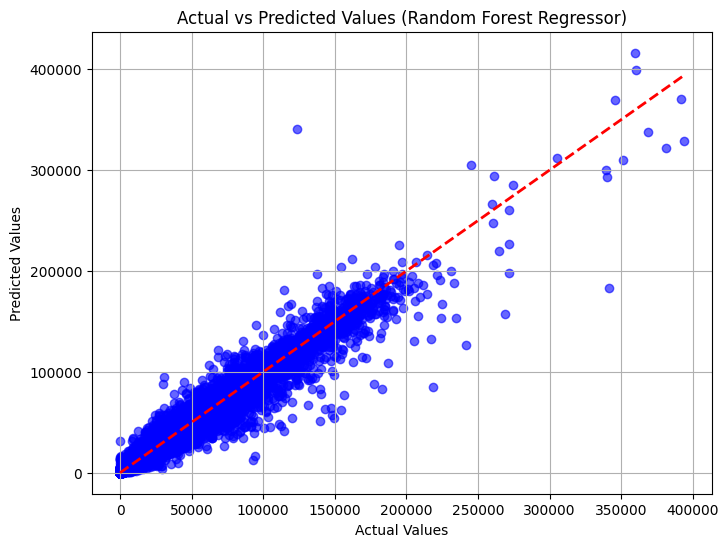

In [89]:
# Plot the actual values vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, c='b', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest Regressor)")
plt.grid(True)
plt.show()

In [90]:
def wmae_test(test, pred): # WMAE for test
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error


In [91]:
wmae_test(y_test, y_pred_rf)


1706.7383005163638